In [1]:
import numpy as np
import pandas as pd
import pickle

dataframes = pd.read_pickle('recom_data/user_category_dummy.pkl')

df_counts = dataframes['view_counts']
df_users = dataframes['users']

with open('recom_data/category_dict.pkl', 'rb') as handle:
    category_dict = pickle.load(handle)

In [2]:
from sklearn.utils import shuffle
# shuffle 라이브러리 사용 -> 전체 평가를 기준으로 랜덤 추출
# 극단적인 경우, 특정 사용자의 모튼 평가가 train_set으로 들어갈 수도 있음

TRAIN_SIZE = 0.75 
# train_set 을 75%로 지정
view_counts = shuffle(df_counts, random_state=1)
# ratings를 섞어줌 -> 사용자-영화-평점이 1세트
cutoff = int(TRAIN_SIZE * len(view_counts))
# 전체 데이터 중 train_set의 개수를 계산
view_train = view_counts.iloc[:cutoff]
view_test = view_counts.iloc[cutoff:]

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

# 변수 초기화
K = 200
mu = view_train['count'].mean() # 전체 평균
M = view_counts.user.max() + 1  # Number of users
N = view_counts.category.max() + 1 # Number of movies

In [4]:
# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [5]:
# Keras model
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

# Concatenate layers
from tensorflow.keras.layers import Dense, Concatenate, Activation
P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])

In [6]:
# # Neural network
# R = Dense(2048)(R)
# R = Activation('linear')(R)
# R = Dense(256)(R)
# R = Activation('linear')(R)
# R = Dense(1)(R)

# model = Model(inputs = [user, item], outputs=R)
# model.compile(
#     loss=RMSE,
#     optimizer=SGD(),
#     #opto,ozer=Adamax(),
#     metrics=[RMSE]
# )
# model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 200)       18244200    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 200)       220600      input_2[0][0]                    
_______________________________________________________________________________________

In [7]:
# # Model fitting
# result = model.fit(
#     x = [view_train.user.values, view_train.category.values],
#     y = view_train['count'].values - mu,
#     epochs = 65,
#     batch_size = 512,
#     validation_data = (
#         [view_train.user.values, view_train.category.values],
#         view_train['count'].values - mu
#     )
# )

Epoch 1/65


C:\Users\lee33\AppData\Local\Programs\Python\Python35\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


94/94 [==============================] - 28s 295ms/step - loss: 152.9743 - RMSE: 1.1578 - val_loss: 150.0910 - val_RMSE: 1.1578
Epoch 2/65
94/94 [==============================] - 27s 289ms/step - loss: 147.3712 - RMSE: 1.1575 - val_loss: 144.5945 - val_RMSE: 1.1577
Epoch 3/65
94/94 [==============================] - 28s 296ms/step - loss: 141.9751 - RMSE: 1.1573 - val_loss: 139.3006 - val_RMSE: 1.1575
Epoch 4/65
94/94 [==============================] - 27s 290ms/step - loss: 136.7779 - RMSE: 1.1573 - val_loss: 134.2022 - val_RMSE: 1.1574
Epoch 5/65
94/94 [==============================] - 28s 293ms/step - loss: 131.7728 - RMSE: 1.1573 - val_loss: 129.2920 - val_RMSE: 1.1572
Epoch 6/65
94/94 [==============================] - 27s 289ms/step - loss: 126.9521 - RMSE: 1.1573 - val_loss: 124.5630 - val_RMSE: 1.1571
Epoch 7/65
94/94 [==============================] - 28s 294ms/step - loss: 122.3094 - RMSE: 1.1568 - val_loss: 120.0086 - val_RMSE: 1.1571
Epoch 8/65
94/94 [====================

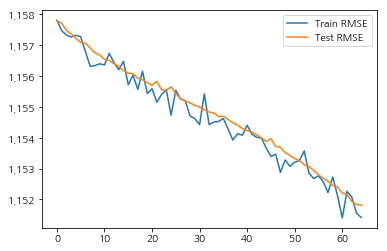

In [8]:
# # Plot RMSE
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(result.history['RMSE'], label="Train RMSE")
# plt.plot(result.history['val_RMSE'], label="Test RMSE")
# plt.legend()
# plt.show()

In [9]:
# user_ids = view_test.user.values
# category_ids = view_test.category.values
# user = np.array([90421] * len(category_dict))
# categories = np.array(list(category_dict.keys()))
# predictions = model.predict([user, categories]) + mu

# print(category_dict[categories[predictions.argmax()]])
# print(predictions.argmax())
# print("Actuals: \n", view_test[0:6])
# print()
# print("Predictions: \n", predictions)

In [1]:
import pandas as pd
import numpy as np
import pickle

dataframes = pd.read_pickle('recom_data/user_category_dummy3.pkl')

df_counts = dataframes['view_counts']
df_users = dataframes['users']

with open('recom_data/category_dict.pkl', 'rb') as handle:
    category_dict = pickle.load(handle)

item_similarity = pd.read_pickle('recom_data/item_similarity.pkl')

In [2]:
from sklearn.utils import shuffle
# shuffle 라이브러리 사용 -> 전체 평가를 기준으로 랜덤 추출
# 극단적인 경우, 특정 사용자의 모튼 평가가 train_set으로 들어갈 수도 있음

TRAIN_SIZE = 0.75 
# train_set 을 75%로 지정
view_counts = shuffle(df_counts, random_state=1)
# ratings를 섞어줌 -> 사용자-영화-평점이 1세트
cutoff = int(TRAIN_SIZE * len(view_counts))
# 전체 데이터 중 train_set의 개수를 계산
view_train = view_counts.iloc[:cutoff]
view_test = view_counts.iloc[cutoff:]

In [3]:
def convert_gender(gender):
    if gender == 'M':
        return 1
    elif gender == 'F':
        return 2
    else:
        return 0
    
def convert_age(age):
    if age == 100:
        return 0
    else:
        return age // 10
    
users = df_users.copy()
users['age'] = users['age'].apply(convert_age)
users['gender'] = users['gender'].apply(convert_gender)

A, G = 8, 3
train_age = pd.merge(view_train, users, on='user')['age']
test_age = pd.merge(view_test, users, on='user')['age']

train_gender = pd.merge(view_train, users, on='user')['gender']
test_gender = pd.merge(view_test, users, on='user')['gender']

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.layers import Dense, Concatenate, Activation

# 변수 초기화
K = 200
mu = view_train['count'].mean() # 전체 평균
M = view_counts.user.max() + 1  # Number of users
N = view_counts.category.max() + 1 # Number of movies

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Keras model
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

age = Input(shape=(1, ))
age_embedding = Embedding(A, 3, embeddings_regularizer=l2())(age)
gender = Input(shape=(1, ))
gender_embedding = Embedding(G, 3, embeddings_regularizer=l2())(gender)

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

age_layer = Flatten( )(age_embedding)
gender_layer = Flatten( )(gender_embedding)

R = Concatenate( )([P_embedding, Q_embedding, user_bias, item_bias, gender_layer, age_layer])

In [5]:
# Neural network
R = Dense(2048)(R)
R = Activation('linear')(R)
R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

model = Model(inputs = [user, item, gender, age], outputs=R)
model.compile(
    loss=RMSE,
    optimizer=SGD(),
    #opto,ozer=Adamax(),
    metrics=[RMSE]
)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

In [6]:
# Model fitting
result = model.fit(
    x = [view_train.user.values, view_train.category.values, train_gender.values, train_age.values],
    y = view_train['count'].values - mu,
    epochs = 40,
    batch_size = 512,
    validation_data = (
        [view_test.user.values, view_test.category.values, test_gender.values, test_age.values],
        view_test['count'].values - mu,
    )
)

Epoch 1/40


C:\Users\lee33\AppData\Local\Programs\Python\Python35\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


93/93 [==============================] - 25s 274ms/step - loss: 152.9796 - RMSE: 1.1733 - val_RMSE: 1.1661 - val_loss: 150.1208
Epoch 2/40
93/93 [==============================] - 32s 339ms/step - loss: 147.4353 - RMSE: 1.1728 - val_RMSE: 1.1661 - val_loss: 144.6809
Epoch 3/40
93/93 [==============================] - 26s 281ms/step - loss: 142.0939 - RMSE: 1.1735 - val_RMSE: 1.1659 - val_loss: 139.4396
Epoch 4/40
93/93 [==============================] - 21s 222ms/step - loss: 136.9471 - RMSE: 1.1728 - val_RMSE: 1.1658 - val_loss: 134.3897
Epoch 5/40
93/93 [==============================] - 19s 209ms/step - loss: 131.9885 - RMSE: 1.1727 - val_RMSE: 1.1657 - val_loss: 129.5243
Epoch 6/40
93/93 [==============================] - 20s 213ms/step - loss: 127.2110 - RMSE: 1.1728 - val_RMSE: 1.1657 - val_loss: 124.8365
Epoch 7/40
93/93 [==============================] - 22s 234ms/step - loss: 122.6079 - RMSE: 1.1726 - val_RMSE: 1.1656 - val_loss: 120.3200
Epoch 8/40
93/93 [====================

In [7]:
model.save("testmodel.h5")

In [21]:
user_ids = view_test.user.values[:6]
category_ids = view_test.category.values[:6]
genders = test_gender.values[:6]
ages = test_age.values[:6]
categories = np.array(list(category_dict.keys()))
predictions = model.predict([user_ids, category_ids, genders, ages]) + mu

print(category_dict[categories[predictions.argmax()]])
print(predictions.argmax())
print("Actuals: \n", view_test[0:6])
print()
print("Predictions: \n", predictions)

여성 하의
2
Actuals: 
         user  category  count
6796   90151       983      2
5261   90118       386      3
36901  90708       856      4
6017   90136       341      1
42560  90785        21      2
59528  91119       562      1

Predictions: 
 [[1.4288921]
 [1.492632 ]
 [1.5163057]
 [1.4235893]
 [1.5062835]
 [1.4413459]]
